In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd

symbols = ['SP500','NASDAQCOM', 'DJCA','NIKKEI225']
data = pd.DataFrame()


In [4]:
# No module named 'pandas_datareader' 가 뜨면 
#Anaconda Powershell Prompt 에서 
#1.pip install pip -upgrade 2. pip install pandas-datareader

#스튜던트 t분포 

In [5]:
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'fred')[sym]
data=data.dropna()

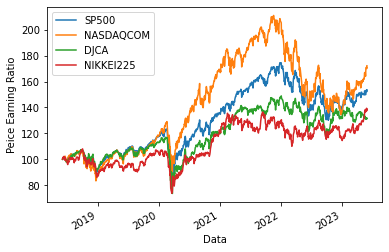

In [6]:
(data/data.iloc[0]*100).plot()
plt.xlabel("Data")
plt.ylabel("Peice Earning Ratio")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

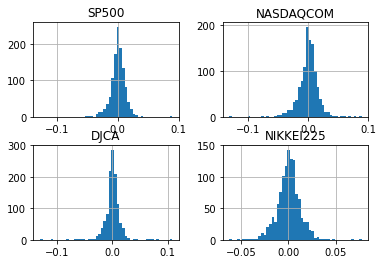

In [8]:
import  numpy as np

log_returns = np.log(data/data.shift(1))
log_returns.hist(bins = 50)
plt.show

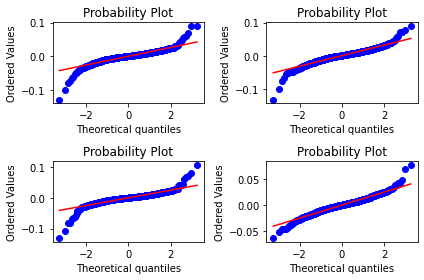

In [9]:
import scipy as sp
import scipy.stats
#Q-Q플롯
log_returns = np.log(data/data.shift(1))

for i, sym in enumerate(symbols):
    ax = plt.subplot(2,2,i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot = ax)
plt.tight_layout()
plt.show()

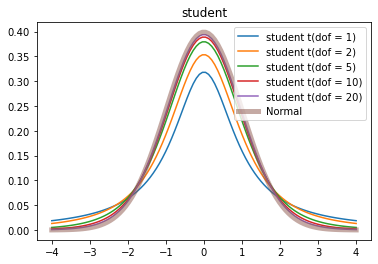

In [10]:
xx = np.linspace(-4,4,100)
for df in [1, 2,5,10,20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx,rv.pdf(xx), label=("student t(dof = %d)"% df))
plt.plot(xx,sp.stats.norm().pdf(xx), label = "Normal", lw = 5, alpha = 0.50)
plt.title("student")
plt.legend()
plt.show() #t분포

In [12]:
for df in [5,10,20]:
    rv = sp.stats.t(df=df)
    print(rv.mean())
    print(rv.var())

0.0
1.6666666666666667
0.0
1.25
0.0
1.1111111111111112


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

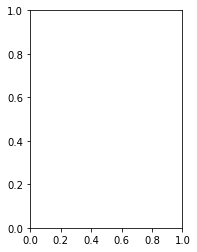

In [30]:
import seaborn as sns #t통계량
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

rv = sp.stats.norm()
M=1000

plt.subplot(1,2,1)
N= 4
x1 =rv.rvs((N,M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis = 0,ddof=1)
x= xbar1/(xstd1/np.sqrt(N))
sns.histplot(x, kde= True)
xx= np.linspace(-6,6,1000)
plt.plot(xx,rv.pdf(xx), 'r:', label = "normal distribution")
plt.xlim(-6,6)
plt.ylim(0,0.5)
plt.title("Statistics distribution N = 4")
plt.legend()

plt.subplot(1,2,2)
N= 40
x2 =rv.rvs((N,M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis = 0,ddof=1)
x= xbar2/(xstd2/np.sqrt(N))
sns.histplot(x, kde= True)
xx= np.linspace(-6,6,1000)
plt.plot(xx,rv.pdf(xx), 'r:', label = "normal distribution")
plt.xlim(-6,6)
plt.ylim(0,0.5)
plt.title("Statistics distribution N = 40")
plt.legend()

plt.show()


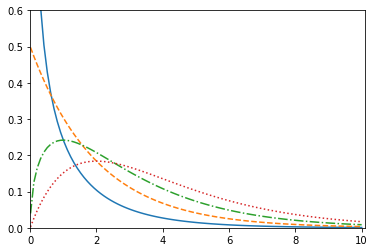

In [22]:
xx= np.linspace(0.01, 10,100)

dfs = np.arange(1,5)
lss = ["-","--","-.",":"]
for df, ls in zip(dfs,lss):
    rv=sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls = ls, label = ("DOF %d)"% df))
plt.xlim(0,10.1)
plt.ylim(0,0.6)
plt.show()

C:\Users\01089\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


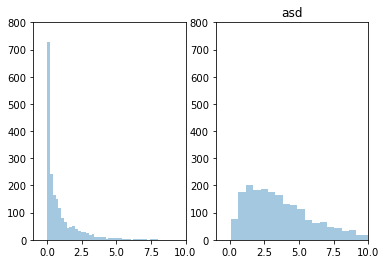

In [29]:
#카이제곱분포
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats

np.random.seed(0)

rv= sp.stats.norm()
M = 2000

plt.subplot(1,2,1)
N =1
x = rv.rvs((N,M))
t = (x**2).sum(axis = 0)
sns.distplot(t, kde =False)
plt.xlim(-1,10)
plt.ylim(0,800)

plt.subplot(1,2,2)
N =4
x = rv.rvs((N,M))
t = (x**2).sum(axis = 0)
sns.distplot(t, kde =False)
plt.xlim(-1,10)
plt.ylim(0,800)
plt.title("asd4")

plt.show()

In [ ]:
#F분포


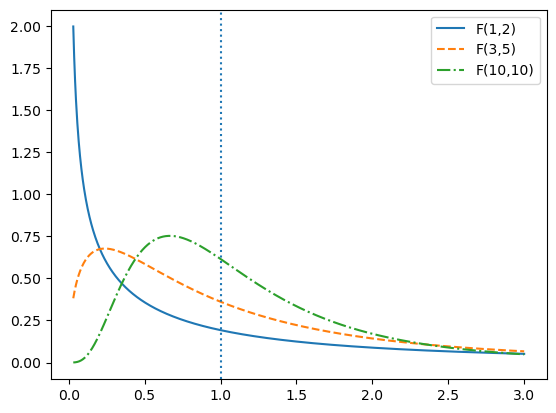

In [44]:
xx= np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1,2).pdf(xx), ls = "-", label = "F(1,2)")
plt.plot(xx, sp.stats.f(3,5).pdf(xx), ls = "--", label = "F(3,5)")
plt.plot(xx, sp.stats.f(10,10).pdf(xx), ls = "-.", label = "F(10,10)")
plt.axvline(1, ls = ":")
plt.legend()

plt.show()

In [ ]:
스튜던트 t분포✿ 추정된 가중치에 대한 확률 분포
카이제곱분포✿ 오차 제곱합에 대한 확률 분포
분포✿ 비교 대상이 되는 선형모형의 오차 제곱합에 대한 비율의
확률 분포


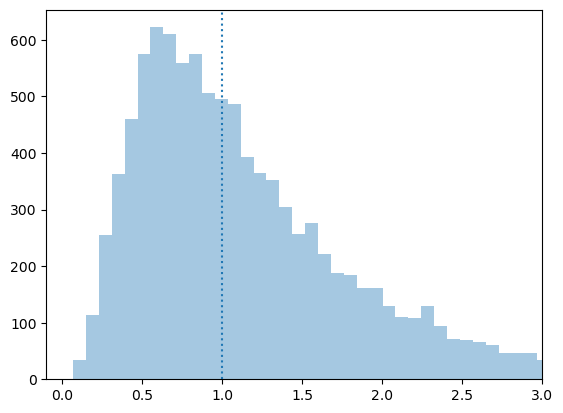

In [46]:
np.random.seed(0)
rv = sp.stats.norm()
M = 10000
N1 =10
x1 = rv.rvs((N1,M)) #size가 생략되어서 (size =())
t1 = (x1**2).sum(axis= 0)


N2 =10
x2 = rv.rvs((N2,M)) #size가 생략되어서 (size =())
t2 = (x2**2).sum(axis= 0)

t = t2/ t1
sns.distplot(t, bins= 200, kde = False)
plt.axvline(1, ls= ":")
plt.xlim(-0.1,3)
plt.show()

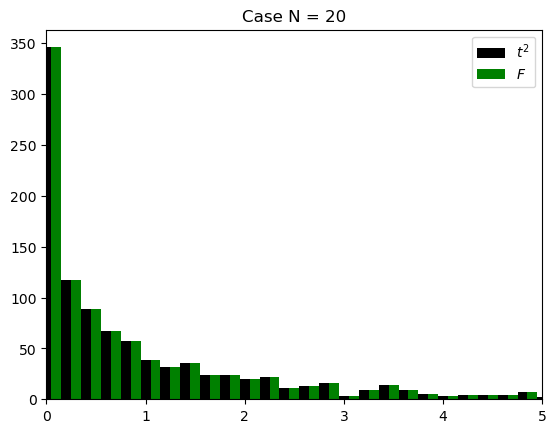

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats

def plot_t2_f(N):
    np.random.seed(0)
    t2 = sp.stats.t(df=N).rvs(1000)**2
    f = sp.stats.f(1,N).rvs(1000)
    plt.hist(t2,  bins = 50,  range = (0,10),  rwidth = 0.5, align = 'left', color = 'k', label = '$t^2$')
    plt.hist(t2,  bins = 50,  range = (0,10),  rwidth = 0.5, align = 'mid', color = 'g', label = '$F$')
    plt.xlim(0,5)
    plt.legend()
    plt.title('Case N = {}'.format(N))
    
plot_t2_f(20)


In [ ]:
표준정규분포를 따르는 모집단에서 추출된 N개의 확률표본을 ~~하면 N = 5,10,30,1000일때 P(siga X^2<= a ) = 0/95인 상수 a 의 값

In [68]:
for df in [5,10,30, 100]:
    rv = sp.stats.chi2(df=df) #확률분포 생성
    print(rv.ppf(0.95)) #cdf의 역함수 ppf() 사용

11.070497693516351
18.307038053275146
43.77297182574219
124.34211340400407
